<a href="https://colab.research.google.com/github/Raghav175/Supervised_Learning/blob/main/LDA_QDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the data file in google drive
df = pd.read_csv('/content/drive/My Drive/WheatData.csv')
df.head(5)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
#checking the shape of dataframe
df.shape

(210, 8)

In [ ]:
#summary statistics
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [ ]:
#checking the count of unique values in 'target' column
print(df['target'].value_counts())

target
0    70
1    70
2    70
Name: count, dtype: int64


In [ ]:
#!pip install pandas-profiling


In [ ]:
#!pip install pydantic-settings

In [ ]:
#!pip install --upgrade pandas-profiling

In [ ]:
!pip install -U ydata-profiling

In [ ]:
#!pip install ydata-profiling # install ydata-profiling which is the replacement of pandas-profiling

# Importing packages
import pandas as pd
import ydata_profiling as pp # use ydata_profiling
from IPython.display import IFrame


# Profile Report
WheatReport = pp.ProfileReport(df, title="Wheat Data Report", explorative=True)
WheatReport.to_file('WheatReport-lib.html')

# Display the report
display(IFrame('WheatReport-lib.html', width=900, height=350))

In [ ]:
#applying levene's test to check the equality of variance across the 3 unique groups
import scipy.stats as stats

target_groups = df['target'].unique()  # Get unique values in 'target'

cnt = 1
for col in df.columns:
    if col == 'target':  # Skip the target column itself
        continue

    # Apply Levene's test for each feature column across target groups (0, 1, 2)
    stat, p = stats.levene(df[col][df['target'] == target_groups[0]],
                           df[col][df['target'] == target_groups[1]],
                           df[col][df['target'] == target_groups[2]])

    print(f"Column: {col}")
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # Interpret the p-value
    alpha = 0.05
    if p > alpha:
        print('Covariance the Same (fail to reject H0)')
    else:
        print('Covariance different (reject H0)')

    print('\n')
    cnt += 1


Column: A
Statistics=7.885, p=0.001
Covariance different (reject H0)


Column: P
Statistics=7.772, p=0.001
Covariance different (reject H0)


Column: C
Statistics=4.320, p=0.015
Covariance different (reject H0)


Column: LK
Statistics=10.216, p=0.000
Covariance different (reject H0)


Column: WK
Statistics=2.010, p=0.137
Covariance the Same (fail to reject H0)


Column: A_Coef
Statistics=0.288, p=0.750
Covariance the Same (fail to reject H0)


Column: LKG
Statistics=5.547, p=0.005
Covariance different (reject H0)




In [ ]:
#Create x and y variables
X = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
X_train_smt,y_train_smt = smt.fit_resample(X_train, y_train)



In [ ]:
X_train_smt.shape

(168, 7)

In [ ]:
y_train_smt.shape

(168,)

In [ ]:
#value counts of y_train_smt to check class imbalance

print(pd.Series(y_train_smt).value_counts())

0    56
2    56
1    56
Name: count, dtype: int64


In [ ]:
#Create x and y variables
X = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
X_train_smt,y_train_smt = smt.fit_resample(X_train, y_train)

In [ ]:
#Create x and y variables
X = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
X_train_smt,y_train_smt = smt.fit_resample(X_train, y_train)



In [ ]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(X_train_smt)
x_test2 = sc.transform(X_test)

#Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [ ]:
# to check how LDA and QDA Models are performing
from sklearn.metrics import classification_report, confusion_matrix

for name, method in [('LDA', LinearDiscriminantAnalysis()), ('QDA', QuadraticDiscriminantAnalysis())]:
    method.fit(x_train2, y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name))
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))



Estimator: LDA
[[13  1  0]
 [ 0 14  0]
 [ 1  0 13]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42


Estimator: QDA
[[12  1  1]
 [ 0 14  0]
 [ 1  0 13]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.93      1.00      0.97        14
           2       0.93      0.93      0.93        14

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



In [ ]:
#Construct some pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lda = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearDiscriminantAnalysis())])
pipeline.insert(0,pipe_lda)

pipe_qda = Pipeline([('scl', StandardScaler()),
                    ('clf', QuadraticDiscriminantAnalysis())])
pipeline.insert(1,pipe_qda)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='liblinear',
                                               class_weight='balanced',
                                               random_state=100))])
pipeline.insert(2,pipe_logreg)


# Set grid search params

modelpara =[]

param_gridlda = {'clf__solver':['svd','lsqr','eigen']}
modelpara.insert(0,param_gridlda)

param_gridqda = {}
modelpara.insert(1,param_gridqda)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100],
                    'clf__penalty': ['l1', 'l2']}
modelpara.insert(2,param_gridlogreg)

In [ ]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=  X_train_smt,
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,color='blue', marker='o',
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.0])
    plt.show()

LDA Learning Curve


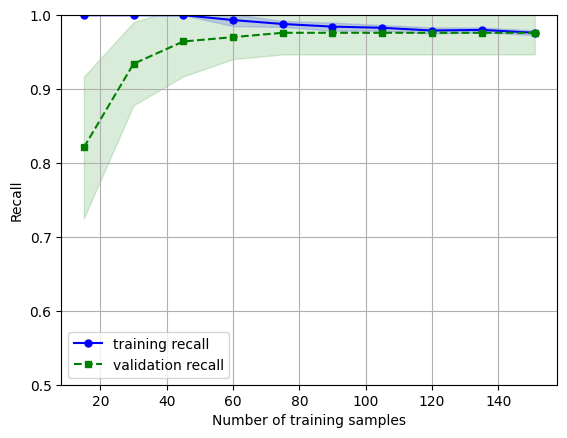


 QDA Learning Curve


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

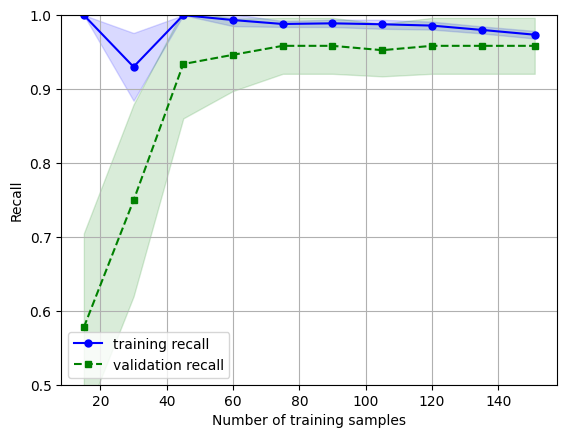

In [ ]:
#Plot Learning Curve
print('LDA Learning Curve')
plot_learning_curves(pipe_lda)
print('\n QDA Learning Curve')
plot_learning_curves(pipe_qda)


Model Evaluation - Recall Score
LDA 0.97 +/- 0.03
QDA 0.95 +/- 0.05




<ipython-input-23-e338c299231c>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


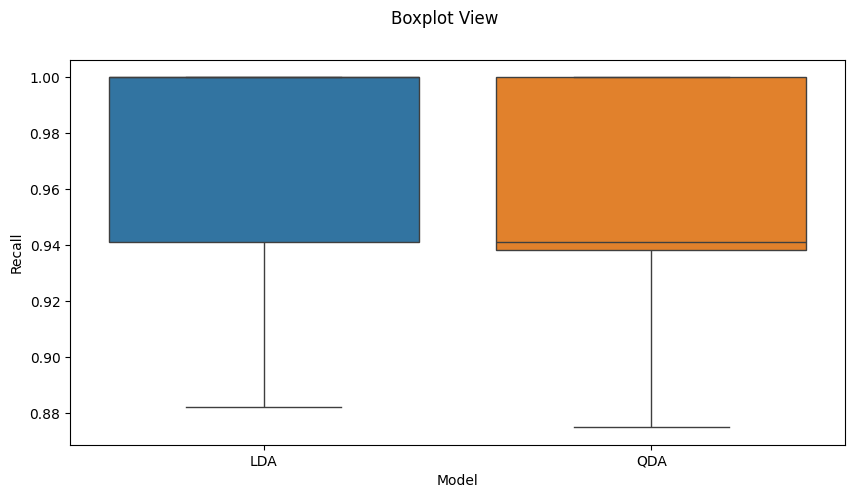

In [ ]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LDA',pipe_lda))
models.append(('QDA',pipe_qda))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,X_train_smt,y_train_smt,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

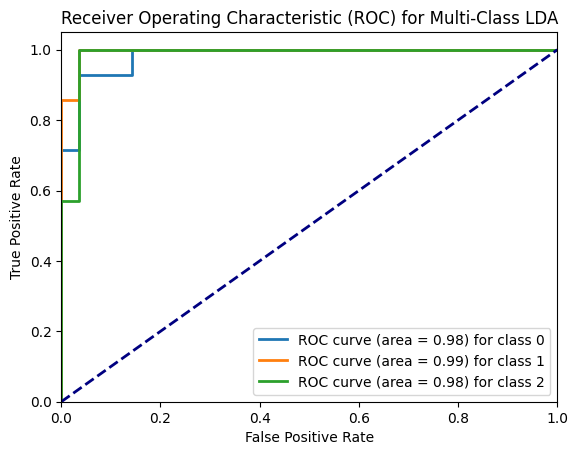

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming you have trained a model (e.g., 'pipe_lda') and have predictions for the test set
y_score = pipe_lda.fit(x_train2, y_train_smt).decision_function(x_test2)

# Binarize the labels for ROC-AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class LDA')
plt.legend(loc="lower right")
plt.show()

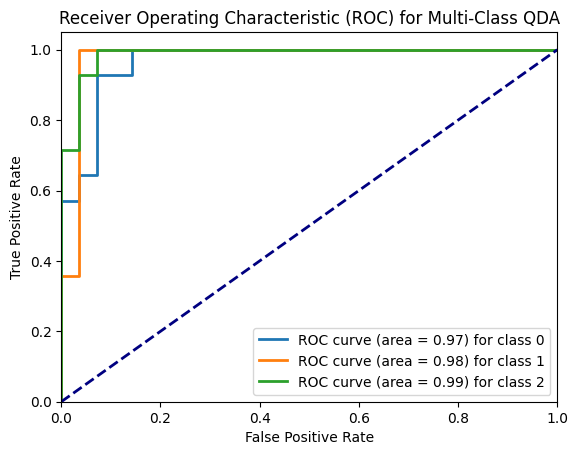

In [ ]:


# Assuming you have trained a model (e.g., 'pipe_qda') and have predictions for the test set
y_score = pipe_qda.fit(x_train2, y_train_smt).decision_function(x_test2)

# Binarize the labels for ROC-AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class QDA')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!jupyter nbconvert --to html /content/LDA_QDA_v3.ipynb


[NbConvertApp] Converting notebook /content/LDA_QDA_v3.ipynb to html
[NbConvertApp] Writing 899760 bytes to /content/LDA_QDA_v3.html
